## Linear Regression Assignment

### Problem Statement: BoomBikes, a US bike-sharing provider, seeks to boost post-pandemic revenues. They aim to identify key factors influencing shared bike demand in the American market through data analysis. 

### Goal: Goal is to model the demand for shared bikes with the available independent variables.

### Factors which may affect the demand for bikes, considering the data:

* Weather Conditions: Favourable weather encourages bike usage.
* Weekdays or Weekends both influence demand on shared bike, as Weekdays see increased shared bike demand for commute to work, traffic congestion. On the other side weekends are associated with leisure and recreational activities, such as sightseeing, shopping, and visiting parks, which can drive shared bike demand.

### Importing Library

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# For calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Data Understanding

In [96]:
#Read the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#info to check the datatypes of all the columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#describe to get to know the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [5]:
# shape of df

print(df.shape)

(730, 16)


In [6]:
# Checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#check the shape before dropping dubplicates
df.shape

(730, 16)

In [8]:
# check for duplicates, standard EDA process
if df.duplicated().any():
    df.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 16)

#### From the null and duplicate check, we can see that there are no null and duplicate values, as the dataframe shape is (730,16) after the process.

#### Dropping unnecessary columns:
* instant - this has indexes for the row
* dteday - this has date which can be compensated by year and month column
* casual and registered - this is breakup for cnt column, may cause data leakage since these are continuos features

In [9]:
columns_to_drop = ["instant", "dteday", "casual", "registered"]
df_subset = df.drop(columns_to_drop, axis=1)

In [10]:
# Checking the shape.

df_subset.shape

(730, 12)

In [11]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Handling Categorical Variables

In [12]:
# Mapping the season column

df_subset.season = df_subset.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})

In [13]:
# Mapping the month column

df_subset.mnth = df_subset.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [14]:
# Mapping the weekday column

df_subset.weekday = df_subset.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [15]:
# Mapping the weathersit column

df_subset.weathersit = df_subset.weathersit.map({1:'Clear', 2:'Misty', 3:'Light_snow_rain', 4:'Heavy_snow_rain'})

In [16]:
df_subset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Checking the column info of the dataset

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### 2. Visualising the Data and EDA

#### a. Visualising Numeric Variables of df_subset

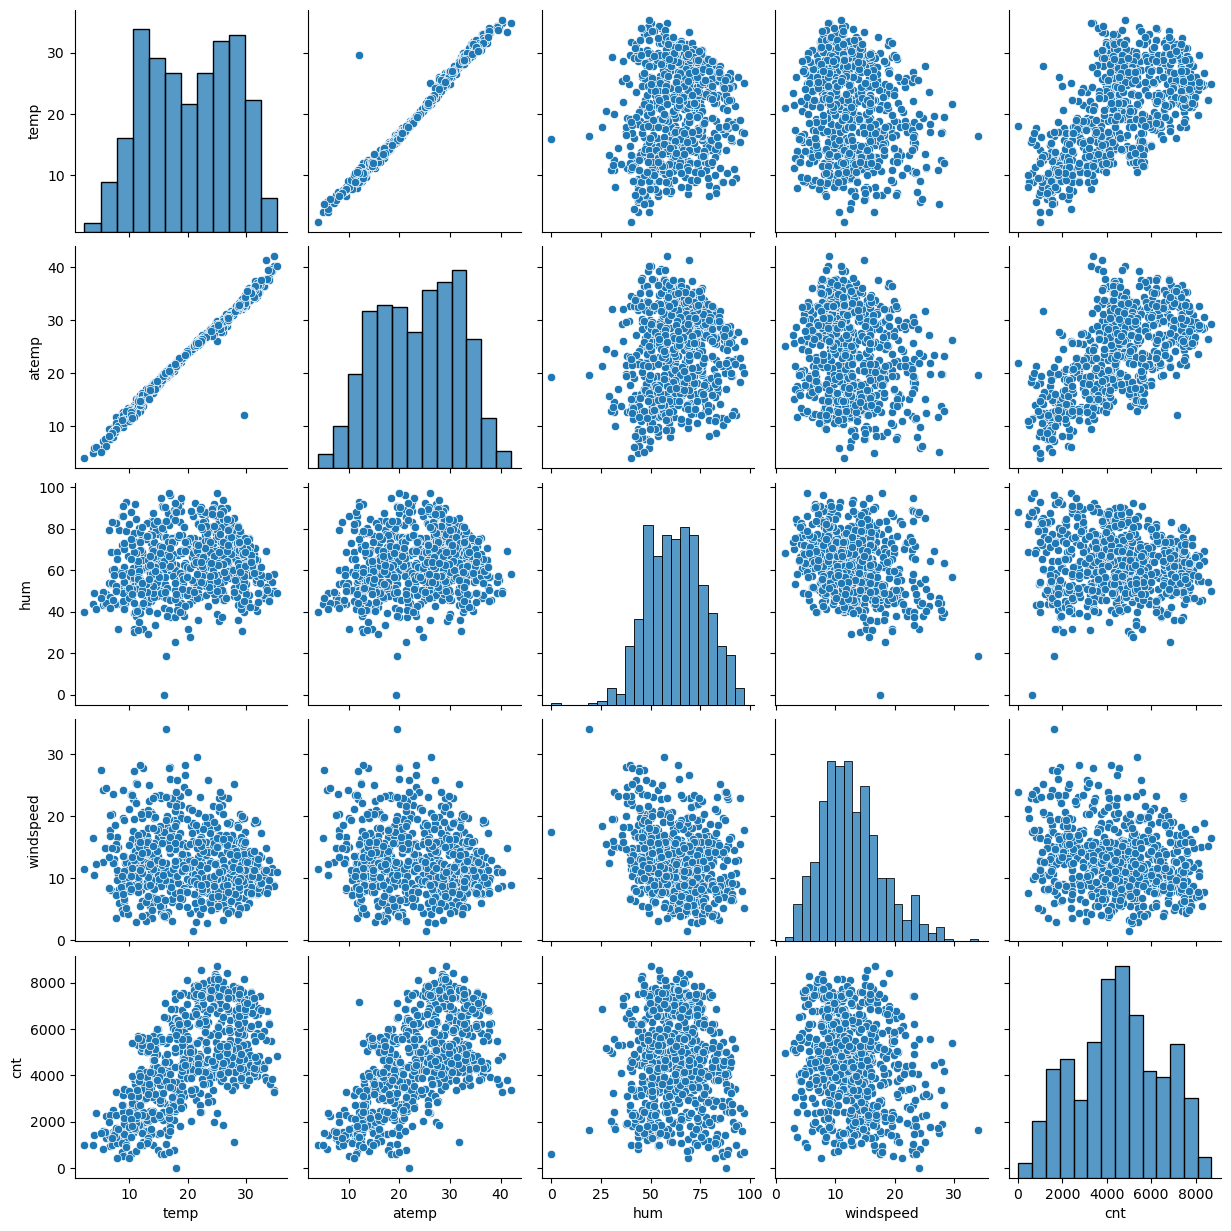

In [18]:
numerical_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']

# The diag_kind='kde' parameter tells the pairplot() function to use a kernel density estimate (KDE) 
# plot for the diagonal subplots of the grid
sns.pairplot(data=df_subset, vars=numerical_vars)
plt.show()

##### The Pair-Plot graphs show that there is a linear relationship between temp, atemp and cnt (target var).

#### b. Visualising Categorical Variables

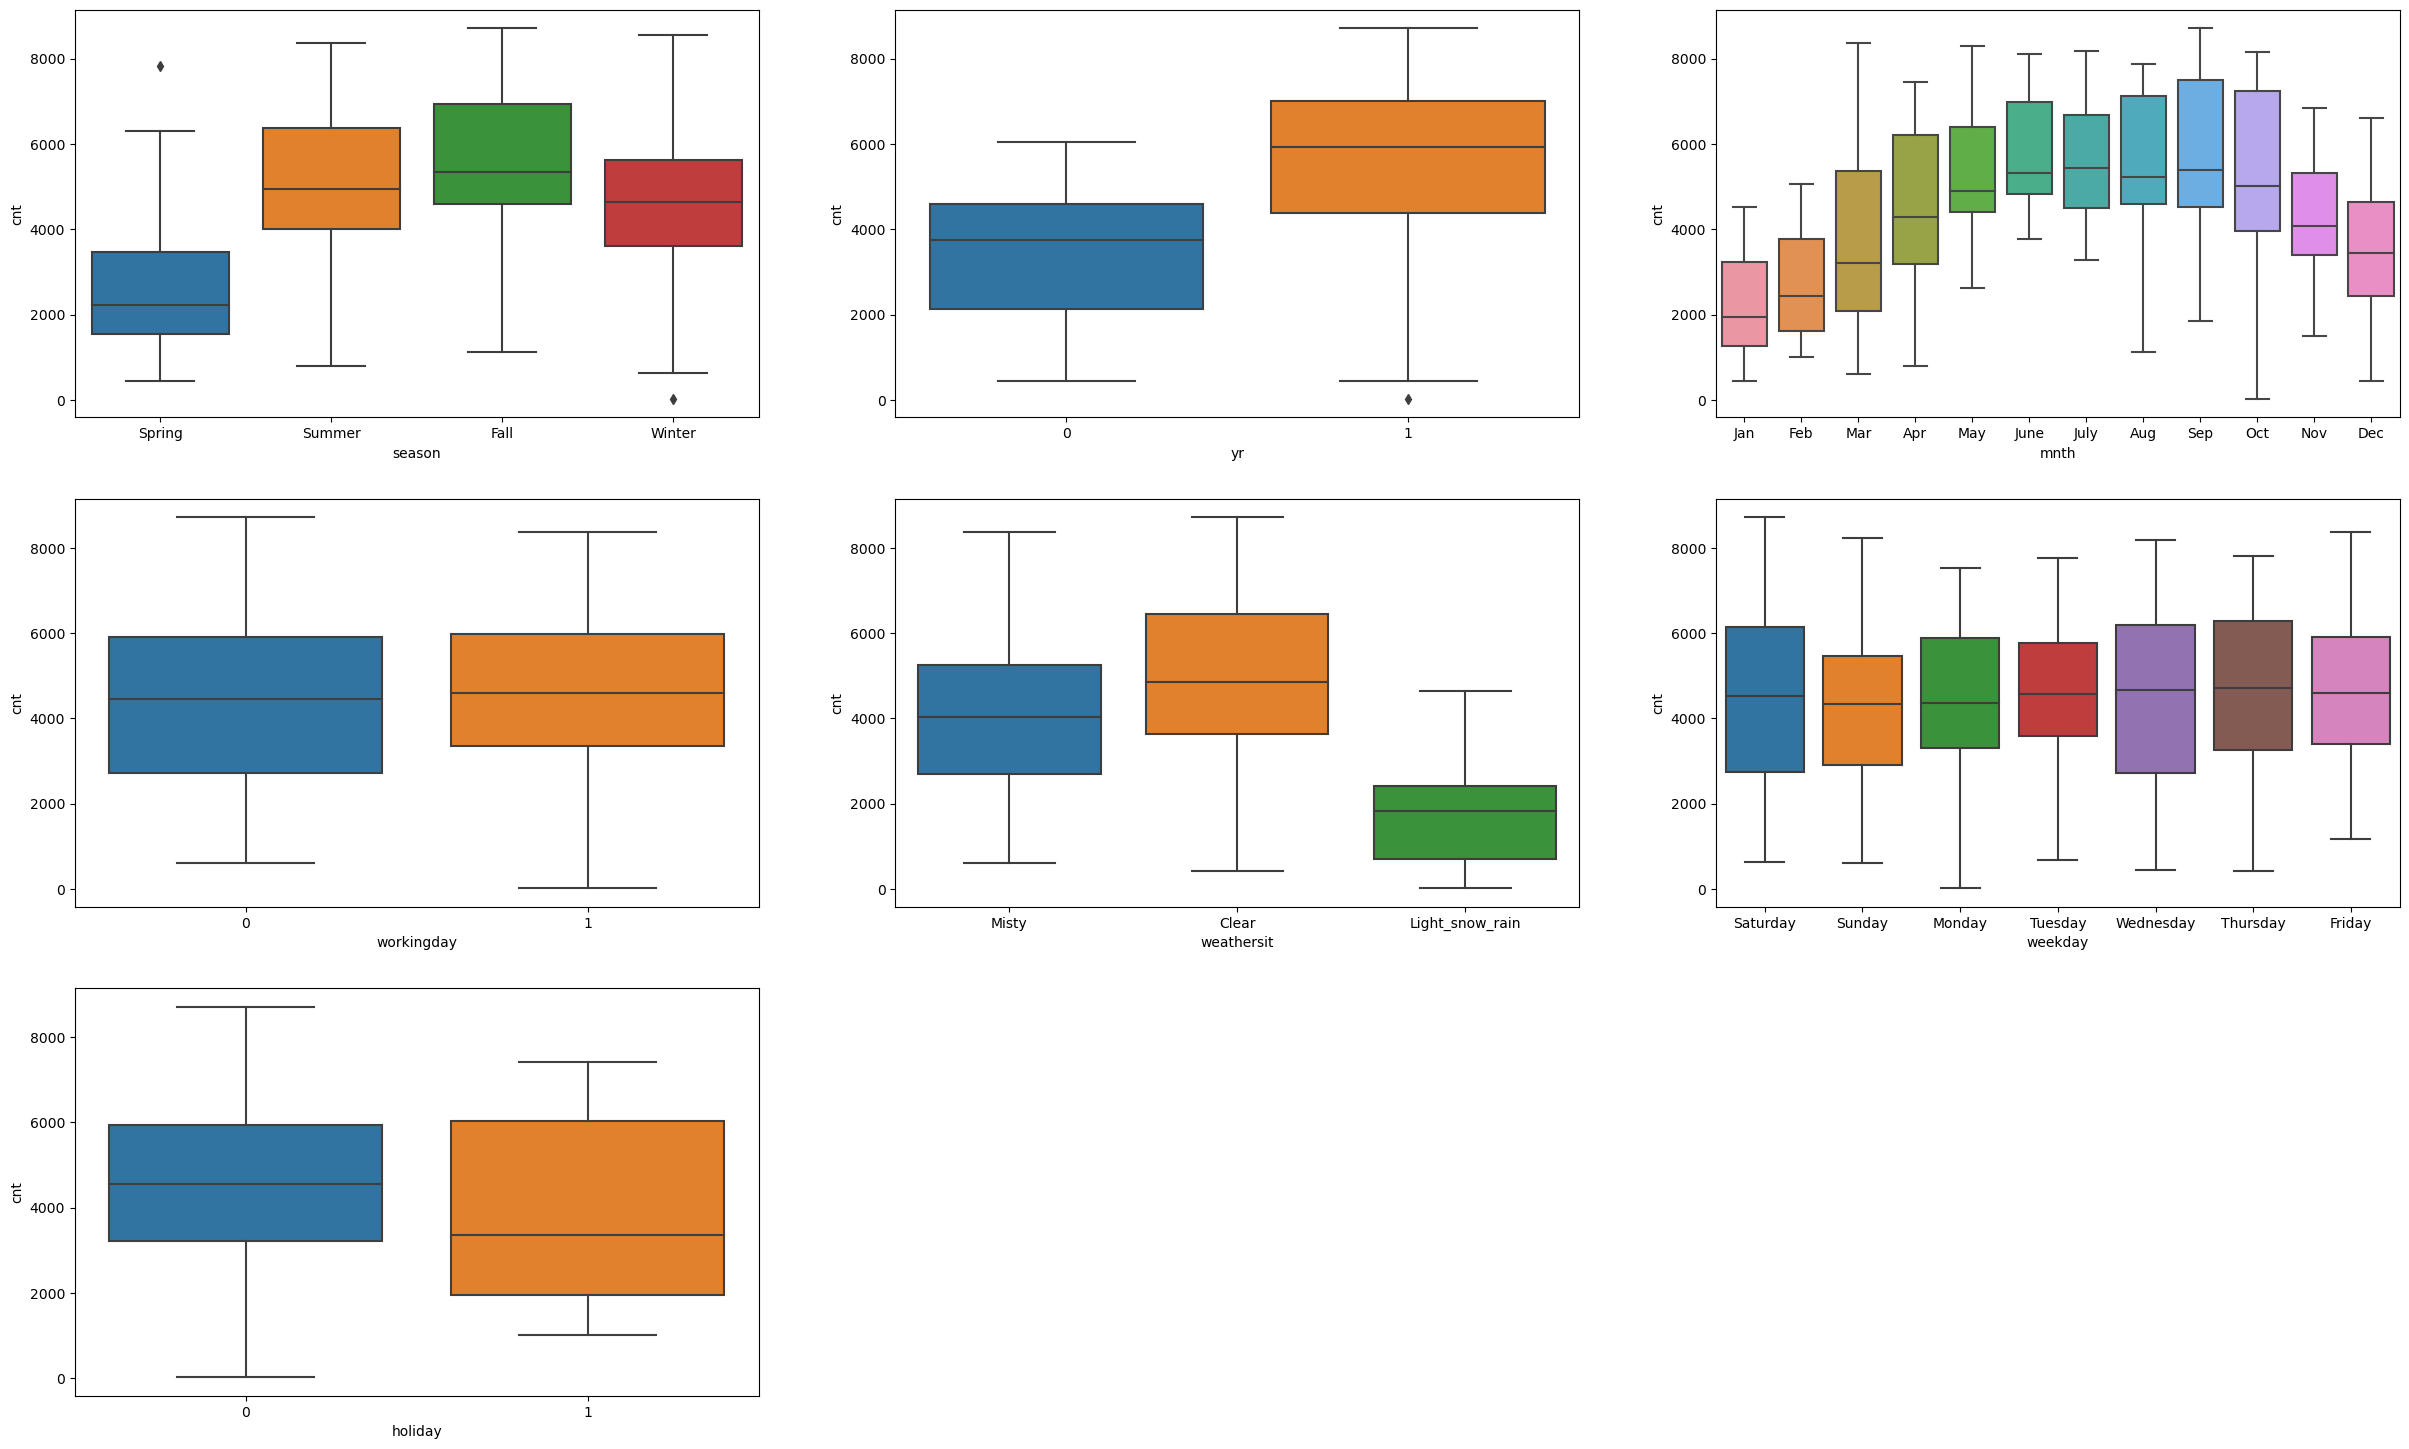

In [19]:
categorical_vars=['season', 'yr', 'mnth', 'weathersit', 'holiday', 'weekday', 'workingday']

#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_subset)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_subset)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_subset)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_subset)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_subset)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_subset)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_subset)
plt.show()

#### c. Visualising Categorical Variables : Multivariate Analysis

<Axes: xlabel='season', ylabel='cnt'>

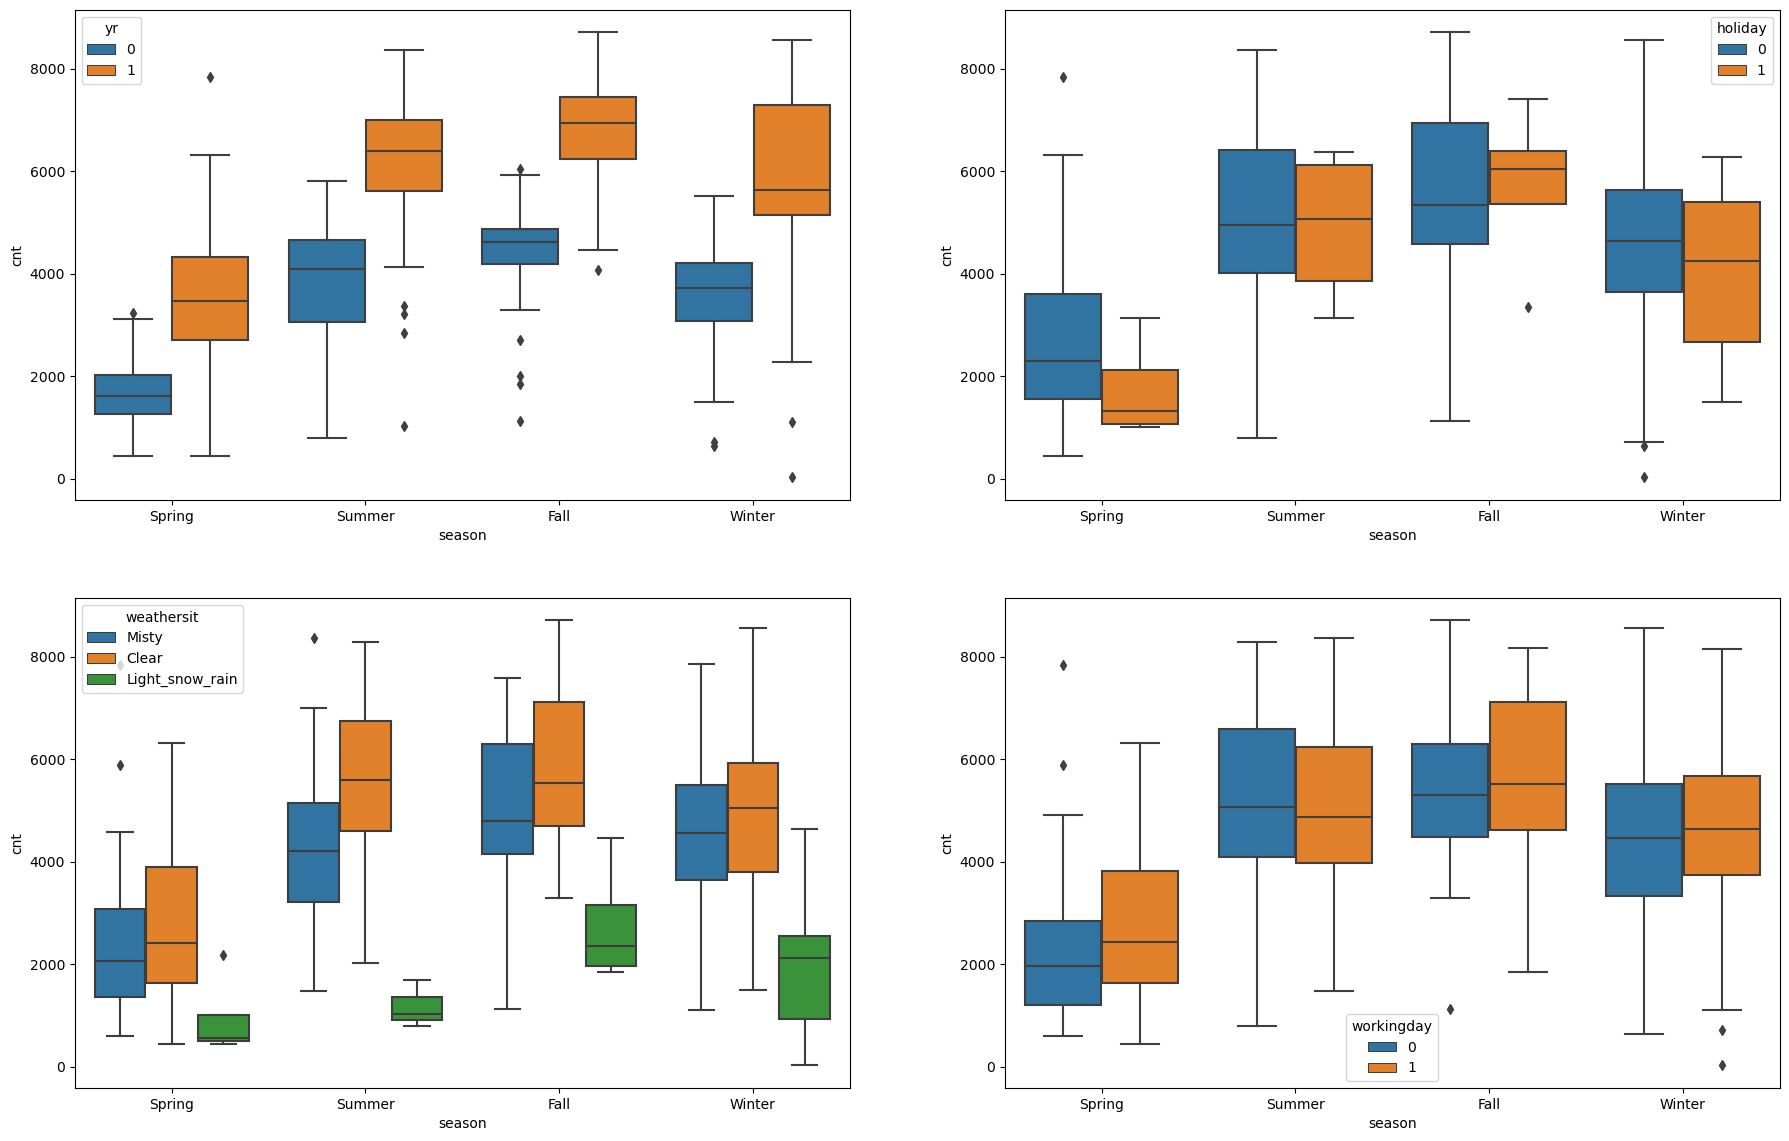

In [20]:
plt.figure(figsize=(22, 14))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df_subset)

plt.subplot(2,2,2)
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df_subset)

plt.subplot(2,2,3)
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df_subset)

plt.subplot(2,2,4)
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = df_subset)

#### We could see some patterns here:
1. "fall" has on an average higher "cnt" than other seasons. 2019 has an increase over 2018.
2. demand for bikes, during holidays is more during summer and fall 
3. When weather situation is "Clear", "cnt" is a little higher as compared to other weather situations. "2019" has an increase over "2018".
4. During holidays "cnt" is higher in summer and fall

### Checking the correlation coefficients between numerical variables to confirm on their correlation

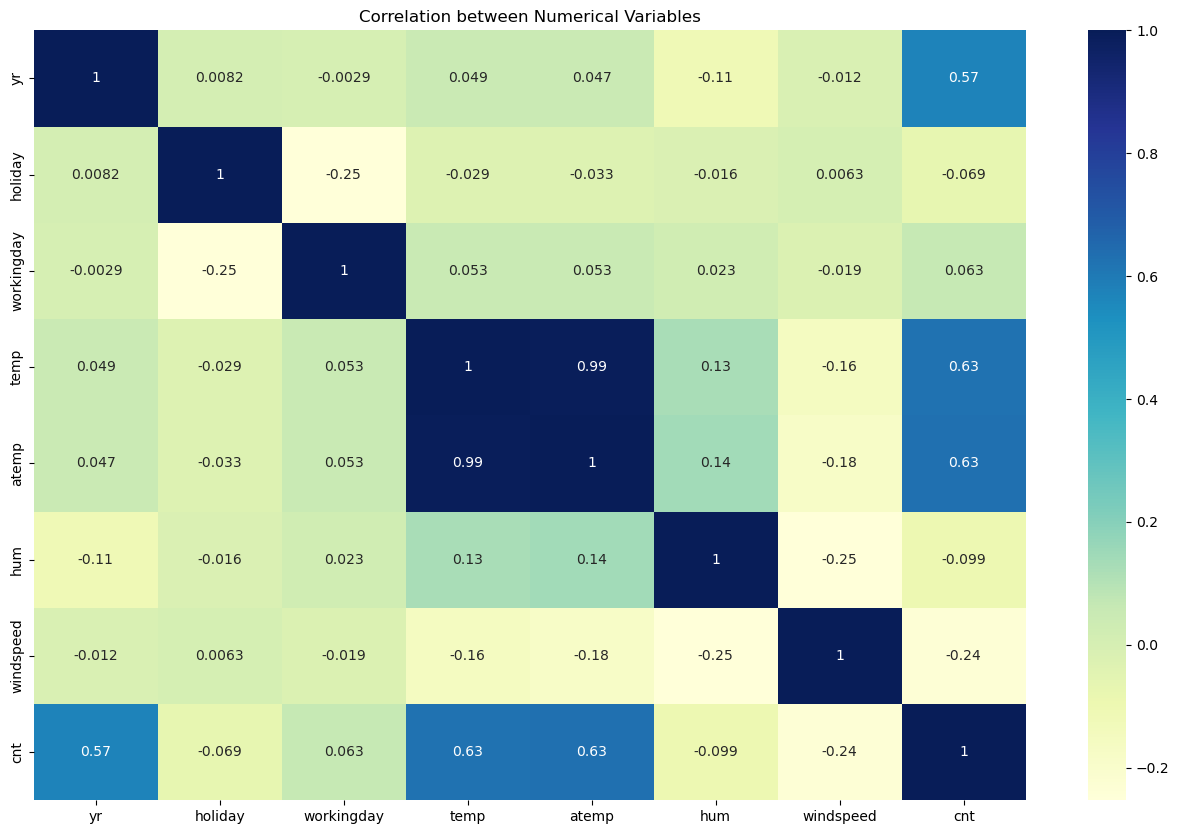

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_subset.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between Numerical Variables")
plt.show()

### Correlation between temp and atemp is 0.99 

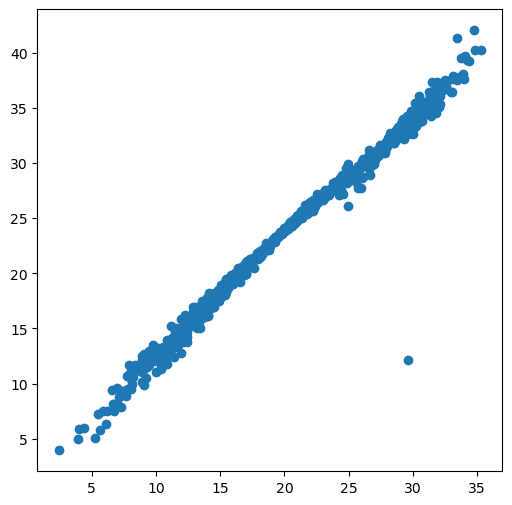

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(df_subset.temp, df_subset.atemp)
plt.show()

#### We could see that atemp and temp are highly corelated and hence one should be removed due to multicolineaity. 

In [23]:
#Let us drop temp and consider atemp
df_subset.drop(['temp'],axis=1,inplace=True)
df_subset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Misty,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Misty,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


### Step 3: Data Preparation

In [24]:
# Convert to 'category' data type

df_subset['season']=df_subset['season'].astype('category')
df_subset['weathersit']=df_subset['weathersit'].astype('category')
df_subset['mnth']=df_subset['mnth'].astype('category')
df_subset['weekday']=df_subset['weekday'].astype('category')

In [25]:
# create dummy vars for these categorical vars
# simultaneously drop the first dummy vars for each of these variables.

df_subset = pd.get_dummies(df_subset, drop_first=True)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   atemp                       730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_Spring               730 non-null    uint8  
 8   season_Summer               730 non-null    uint8  
 9   season_Winter               730 non-null    uint8  
 10  mnth_Aug                    730 non-null    uint8  
 11  mnth_Dec                    730 non-null    uint8  
 12  mnth_Feb                    730 non-null    uint8  
 13  mnth_Jan                    730 non

In [26]:
df_subset.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow_rain,weathersit_Misty
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# Describe the dataframe after adding dummies
df_subset.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow_rain,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4: Splitting the Data into Training and Testing Sets

In [28]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# Splitting the Data into Training and Testing Sets
df_train, df_test = train_test_split(df_subset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
# Checking shape for training dataframe
df_train.shape

(510, 29)

In [30]:
# Checking shape for testing dataframe
df_test.shape

(219, 29)

In [31]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow_rain,weathersit_Misty
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,510.0,0.025490,0.157763,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,510.0,0.676471,0.468282,0.000000,0.000000,1.000000,1.000000,1.000000
atemp,510.0,23.493909,8.090038,3.953480,16.603063,24.020400,30.177700,42.044800
hum,510.0,63.112926,14.156632,0.000000,52.270825,63.437500,73.250025,97.041700
windspeed,510.0,12.831318,5.291832,2.834381,9.041918,12.083182,15.750879,34.000021
cnt,510.0,4486.382353,1952.158739,22.000000,3120.000000,4530.000000,5973.500000,8714.000000
season_Spring,510.0,0.243137,0.429398,0.000000,0.000000,0.000000,0.000000,1.000000
season_Summer,510.0,0.245098,0.430568,0.000000,0.000000,0.000000,0.000000,1.000000
season_Winter,510.0,0.249020,0.432870,0.000000,0.000000,0.000000,0.000000,1.000000


In [33]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow_rain,weathersit_Misty
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,219.0,0.479452,0.500722,0.000000,0.000000,0.00000,1.000000,1.000000
holiday,219.0,0.036530,0.188034,0.000000,0.000000,0.00000,0.000000,1.000000
workingday,219.0,0.698630,0.459904,0.000000,0.000000,1.00000,1.000000,1.000000
atemp,219.0,24.255828,8.299641,4.941955,17.085500,24.87315,31.155725,41.318550
hum,219.0,61.961883,14.456669,25.416700,51.166700,60.91670,72.192050,97.250000
windspeed,219.0,12.600130,4.984858,1.500244,9.021282,12.16720,15.395629,27.999836
cnt,219.0,4546.981735,1898.633630,441.000000,3303.500000,4579.00000,5869.500000,8395.000000
season_Spring,219.0,0.255708,0.437258,0.000000,0.000000,0.00000,1.000000,1.000000
season_Summer,219.0,0.264840,0.442259,0.000000,0.000000,0.00000,1.000000,1.000000
season_Winter,219.0,0.232877,0.423633,0.000000,0.000000,0.00000,0.000000,1.000000


In [35]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light_snow_rain', 'weathersit_Misty'],
      dtype='object')

###  Rescaling the Features
There are two common ways of rescaling:

* Min-Max scaling
* Standardisation (mean-0, sigma-1)

* lets use MinMax scaling.

In [36]:
scaler=MinMaxScaler()

In [37]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
atemp,510.0,0.512989,0.212385,0.0,0.332086,0.526811,0.688457,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
season_Spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
season_Summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
season_Winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


In [39]:
#creating X_train AND y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow_rain,weathersit_Misty
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### USING RFE APPROACH FOR FEATURE SELECTION
### WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [43]:
# Printing coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.34182361e-01 -4.49728520e+10 -4.49728520e+10  4.19430649e-01
 -1.45590137e-01 -1.68605230e-01 -5.50349260e-02  3.08191196e-02
  9.97887408e-02  3.68877942e-02 -5.40687154e-02 -4.05220342e-02
 -7.34615282e-02 -2.01234636e-02  1.78109783e-02 -6.50228642e-04
  3.58624975e-02 -4.76606173e-02  7.79608357e-03  9.14706852e-02
 -2.63220112e-02 -4.49728520e+10 -4.49728520e+10 -1.32020101e-02
 -2.21539912e-02 -8.10524979e-03 -2.54545465e-01 -6.26024966e-02]
44972851981.00693


In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light_snow_rain', True, 1),
 ('weathersit_Misty', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light_snow_rain',
       'weathersit_Misty'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Step 5: Building Model using Statsmodel:

In [48]:
def update_ols_model(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model, X_train_sm

def checkVIF(X_rfe) : 
    vif = pd.DataFrame()
    X = X_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
lm0, X_train_rfe0 = update_ols_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          9.67e-187
Time:                        22:19:10   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Checking VIF

In [50]:
vif = checkVIF(X_train_rfe)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,season_Winter,2.93
5,season_Spring,2.89
14,weathersit_Misty,2.26
0,yr,2.06
10,mnth_Nov,1.82
8,mnth_Jan,1.75
7,mnth_Dec,1.54


### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Model 1. Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF of `25.08`. Let's go ahead and drop this variables

In [51]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [52]:
lm1, X_train_rfe1 = update_ols_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.10e-184
Time:                        22:19:10   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
#Again Calculate VIF 
vif = checkVIF(X_train_rfe)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
5,season_Winter,2.55
4,season_Spring,2.36
0,yr,2.06
9,mnth_Nov,1.80
7,mnth_Jan,1.65
13,weathersit_Misty,1.53
6,mnth_Dec,1.46
8,mnth_July,1.35


### Model 2. Updating the Model

As you can see from the summary and the VIF dataframe,all variables are with in safe VIF of 5. So we need not drop based on VIF now. Lets see the regression results summary once.

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, mnth_Nov as it has a very high P Values. Let's go ahead and drop this variables

In [54]:
X_train_rfe=X_train_rfe.drop(['mnth_Nov'],axis=1)
lm2, X_train_rfe2 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.33e-184
Time:                        22:19:10   Log-Likelihood:                 497.69
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.58
3,windspeed,3.94
4,season_Spring,2.36
0,yr,2.06
5,season_Winter,1.65
7,mnth_Jan,1.64
12,weathersit_Misty,1.53
8,mnth_July,1.35
6,mnth_Dec,1.29
9,mnth_Sep,1.20


### Model 3. Dropping the Variable and Updating the Model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, weekday_Saturday as it has a very high P Values. Let's go ahead and drop this variables

In [55]:
X_train_rfe=X_train_rfe.drop(['weekday_Saturday'],axis=1)

In [56]:
lm3, X_train_rfe3 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          8.41e-185
Time:                        22:19:10   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,season_Spring,2.35
0,yr,2.06
5,season_Winter,1.64
7,mnth_Jan,1.64
11,weathersit_Misty,1.53
8,mnth_July,1.35
6,mnth_Dec,1.29
9,mnth_Sep,1.20


### Model 4. Dropping the Variable and Updating the Model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, mnth_Nov as it has a very high P Values. Let's go ahead and drop this variables

In [57]:
X_train_rfe=X_train_rfe.drop(['mnth_Dec'],axis=1)

In [58]:
lm4, X_train_rfe4= update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          5.75e-185
Time:                        22:19:10   Log-Likelihood:                 493.54
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,season_Spring,2.24
0,yr,2.06
6,mnth_Jan,1.60
10,weathersit_Misty,1.53
5,season_Winter,1.40
7,mnth_July,1.35
8,mnth_Sep,1.20
9,weathersit_Light_snow_rain,1.08


### Model 5. Dropping the Variable and Updating the Model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, mnth_Dec as it has a very high P Values. Let's go ahead and drop this variables

In [59]:
X_train_rfe=X_train_rfe.drop(['mnth_Jan'],axis=1)

In [60]:
lm5, X_train_rfe5= update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          5.68e-185
Time:                        22:19:10   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.51
3,windspeed,3.90
0,yr,2.05
4,season_Spring,1.63
9,weathersit_Misty,1.52
5,season_Winter,1.40
6,mnth_July,1.35
7,mnth_Sep,1.20
8,weathersit_Light_snow_rain,1.08
1,holiday,1.04


### Model 6. Now that we have a good model based on p and vif values, lets try to add new vars and see if we are able to build better model

In [61]:
X_train_rfe['weekday_Sunday']=X_train['weekday_Sunday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_Spring,season_Winter,mnth_July,mnth_Sep,weathersit_Light_snow_rain,weathersit_Misty,weekday_Sunday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,1,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,1,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,1
482,1,0,0.391735,0.188475,0,0,0,0,0,1,0


In [62]:
lm6, X_train_rfe6= update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.12e-187
Time:                        22:19:10   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     498   BIC:                            -923.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,yr,2.05
4,season_Spring,1.65
9,weathersit_Misty,1.52
5,season_Winter,1.42
6,mnth_July,1.35
7,mnth_Sep,1.20
10,weekday_Sunday,1.18
8,weathersit_Light_snow_rain,1.08


### Model 7. Lets Add mnth_Oct back to the train data set to check if model improves

In [63]:
X_train_rfe['mnth_Oct']=X_train['mnth_Oct']

lm7, X_train_rfe7 = update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.45e-187
Time:                        22:19:10   Log-Likelihood:                 501.98
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -922.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.64
3,windspeed,3.92
0,yr,2.06
5,season_Winter,1.92
4,season_Spring,1.65
11,mnth_Oct,1.59
9,weathersit_Misty,1.52
6,mnth_July,1.35
7,mnth_Sep,1.22
10,weekday_Sunday,1.18


##### Note: mnth_Oct did not help in improving the model dropping the same

In [64]:
X_train_rfe=X_train_rfe.drop(['mnth_Oct'],axis=1)

##

### Model 8. Lets Add weekday_Monday back to the train data set to check if model improves

In [65]:
X_train_rfe['weekday_Monday']=X_train['weekday_Monday']


lm8, X_train_rfe8 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          9.93e-187
Time:                        22:19:10   Log-Likelihood:                 500.54
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.64
3,windspeed,3.92
0,yr,2.06
4,season_Spring,1.65
9,weathersit_Misty,1.52
5,season_Winter,1.42
6,mnth_July,1.35
11,weekday_Monday,1.31
7,mnth_Sep,1.20
10,weekday_Sunday,1.20


#### dropping weekay_Monday as it has high p value

In [66]:
X_train_rfe=X_train_rfe.drop(['weekday_Monday'],axis=1)

### Model 9. Lets Add weekday_Wednesday  back to the train data set to check if model improves

In [67]:
X_train_rfe['weekday_Wednesday']=X_train['weekday_Wednesday']


lm9, X_train_rfe9 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.08e-186
Time:                        22:19:11   Log-Likelihood:                 499.37
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     497   BIC:                            -917.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.76
3,windspeed,3.91
0,yr,2.05
4,season_Spring,1.66
9,weathersit_Misty,1.52
5,season_Winter,1.42
6,mnth_July,1.35
11,weekday_Wednesday,1.24
10,weekday_Sunday,1.21
7,mnth_Sep,1.20


In [68]:
#dropping Weekday_Wednesday due its high p-value
X_train_rfe=X_train_rfe.drop(['weekday_Wednesday'],axis=1)

### Model 10. Lets Add weekday_Tuesday  back to the train data set to check if model improves

In [69]:
X_train_rfe['weekday_Tuesday']=X_train['weekday_Tuesday']

lm10, X_train_rfe10 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.17e-186
Time:                        22:19:11   Log-Likelihood:                 499.73
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     497   BIC:                            -918.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.69
3,windspeed,3.92
0,yr,2.05
4,season_Spring,1.66
9,weathersit_Misty,1.52
5,season_Winter,1.42
6,mnth_July,1.35
10,weekday_Sunday,1.21
7,mnth_Sep,1.20
11,weekday_Tuesday,1.19


In [70]:
#dropping weekday_Tuesday as it has high p value
X_train_rfe=X_train_rfe.drop(['weekday_Tuesday'],axis=1)

### Model 11. Lets Add weekday_Thursday  back to the train data set to check if model improves

In [71]:
X_train_rfe['weekday_Thursday']=X_train['weekday_Thursday']
X_train_rfe.head()

lm11, X_train_rfe11 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.14e-186
Time:                        22:19:11   Log-Likelihood:                 499.35
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     497   BIC:                            -917.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.70
3,windspeed,3.92
0,yr,2.05
4,season_Spring,1.66
9,weathersit_Misty,1.52
5,season_Winter,1.42
6,mnth_July,1.35
7,mnth_Sep,1.20
10,weekday_Sunday,1.20
11,weekday_Thursday,1.18


In [72]:
# drooping weekday_Thursday as it has high p-value
X_train_rfe=X_train_rfe.drop(['weekday_Thursday'],axis=1)

### Overall we have a decent model now.

#### Renaming final model

In [73]:
lm_final, X_train_rfe_final = update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.12e-187
Time:                        22:19:11   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     498   BIC:                            -923.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,yr,2.05
4,season_Spring,1.65
9,weathersit_Misty,1.52
5,season_Winter,1.42
6,mnth_July,1.35
7,mnth_Sep,1.20
10,weekday_Sunday,1.18
8,weathersit_Light_snow_rain,1.08


### We have considered all columns and checked. Now we can stop the model building and check on which model can we choose

### Out all the models model lm_final (lm6) seems to give good result so we can choose it for predictions.

In [74]:
#Predict values
y_train_cnt = lm_final.predict(X_train_rfe_final)

## -------------------------------------------------------------------------------------------------------------------------------

## Step 6: Residual Analysis

In [75]:
res=y_train - y_train_cnt

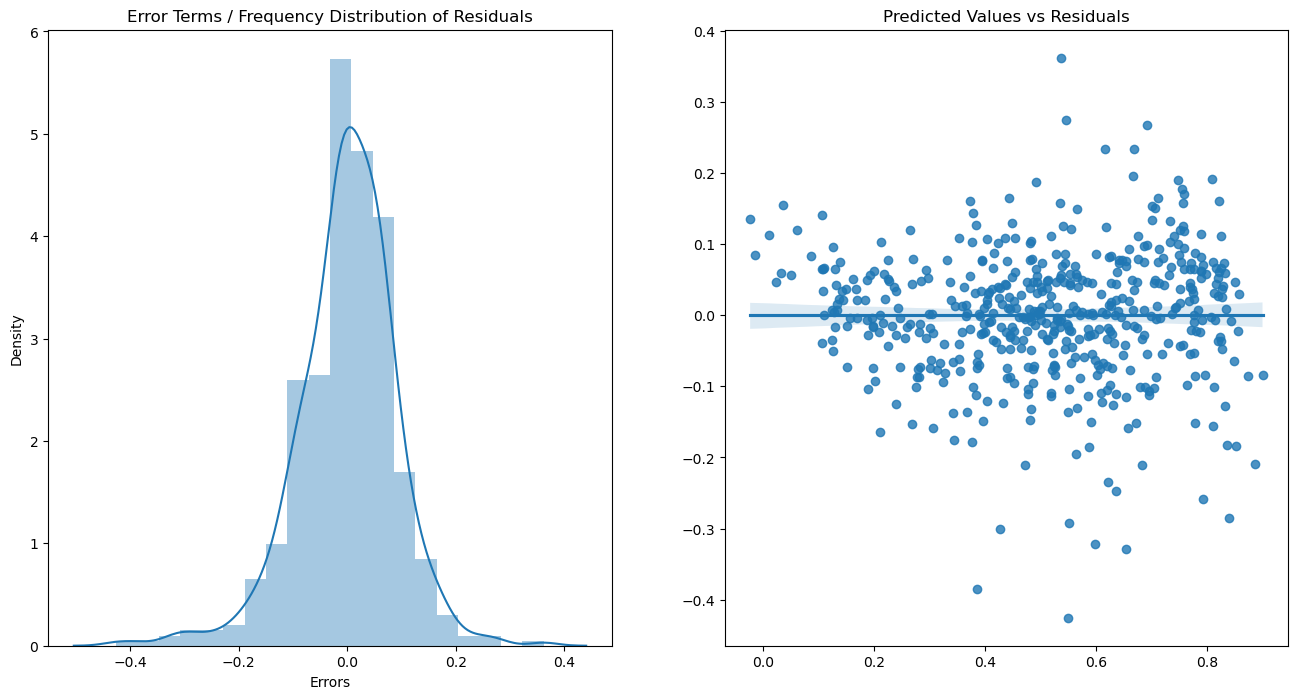

In [76]:
# Plot the histogram of the error terms
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)


ax[0].set(title='Error Terms / Frequency Distribution of Residuals')
sns.distplot((res), bins = 20, ax=ax[0])
ax[0].set(xlabel='Errors')

# predicted vs residuals
ax[1].set(title='Predicted Values vs Residuals')
sns.regplot(x=y_train_cnt,y=res,ax=ax[1])
plt.show()

In [77]:
#Checking columns
X_train_rfe_final.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_July', 'mnth_Sep', 'weathersit_Light_snow_rain',
       'weathersit_Misty', 'weekday_Sunday'],
      dtype='object')

In [78]:
print(X_train_rfe_final.shape)
print(res.shape)

(510, 12)
(510,)


In [79]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [80]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
X_train_new = X_train_rfe_final.drop(['const'], axis=1)
cols=X_train_new.columns
cols

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_July', 'mnth_Sep', 'weathersit_Light_snow_rain',
       'weathersit_Misty', 'weekday_Sunday'],
      dtype='object')

In [82]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [83]:
X_train_rfe_final.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_July', 'mnth_Sep', 'weathersit_Light_snow_rain',
       'weathersit_Misty', 'weekday_Sunday'],
      dtype='object')

In [84]:
#Making predictions on the chosen model

y_pred = lm_final.predict(X_test_new)

### Step 7: Model Evaluation
Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

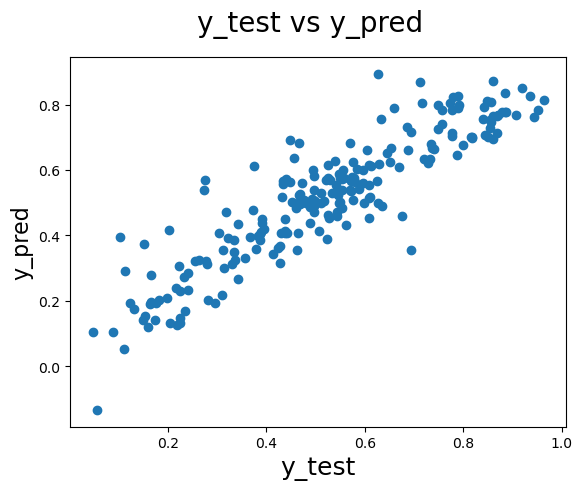

In [85]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [86]:
#Returns the mean squared error; we'll take a square root
print(mean_squared_error(y_test, y_pred))
np.sqrt(mean_squared_error(y_test, y_pred))

0.00892153583719761


0.09445388206525769

### Calculate the r square for test

In [87]:
r_squared = r2_score(y_test, y_pred)
round(r_squared,4)

0.8122

In [88]:
X_t=X_train_new.iloc[:,0].values

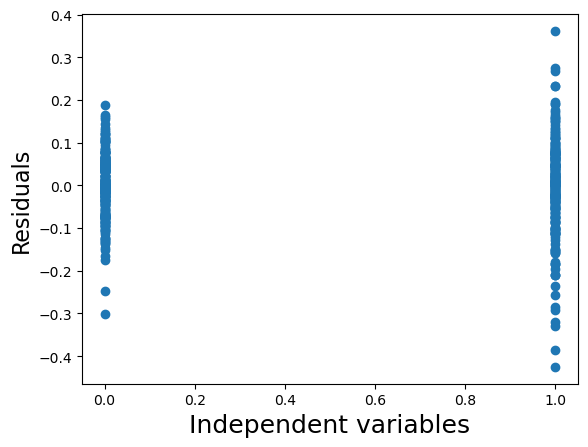

In [89]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [90]:
X_train_new.head()

,yr,holiday,atemp,windspeed,season_Spring,season_Winter,mnth_July,mnth_Sep,weathersit_Light_snow_rain,weathersit_Misty,weekday_Sunday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,1,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,1,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,1
482,1,0,0.391735,0.188475,0,0,0,0,0,1,0


In [91]:
print(X_train_rfe_final.columns)
print(lm_final.summary())

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_July', 'mnth_Sep', 'weathersit_Light_snow_rain',
       'weathersit_Misty', 'weekday_Sunday'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.12e-187
Time:                        22:19:12   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     498   BIC:                            -923.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                 

In [92]:
round(lm_final.params,4)

const                         0.2620
yr                            0.2350
holiday                      -0.1028
atemp                         0.4632
windspeed                    -0.1254
season_Spring                -0.1167
season_Winter                 0.0412
mnth_July                    -0.0657
mnth_Sep                      0.0587
weathersit_Light_snow_rain   -0.2872
weathersit_Misty             -0.0837
weekday_Sunday               -0.0484
dtype: float64

### -----------------------------------------------------------------------------------------------------------------------------------------------------------
## We can see that the equation for best fitted line is:

### cnt = 0.2620 + 0.2350 X yr - 0.1028 X holiday + 0.4632 X atemp - 0.1254 X windspeed -0.1167 X season_Spring + 0.0412 X season_Winter - 0.0657 X mnth_July + 0.0587 X mnth_Sep - 0.2872 X weathersit_Light rain_Light snow_Thunderstorm - 0.0837 X weathersit_Mist_cloudy -0.0484 X weekday_Sunday

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [93]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r_squared)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7845


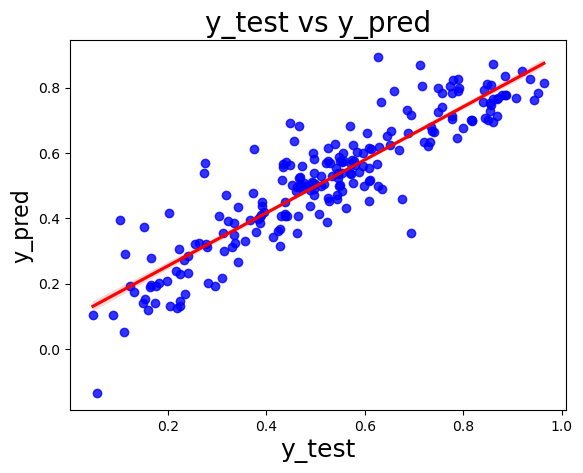

In [94]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Checking the correlations using final pred variables

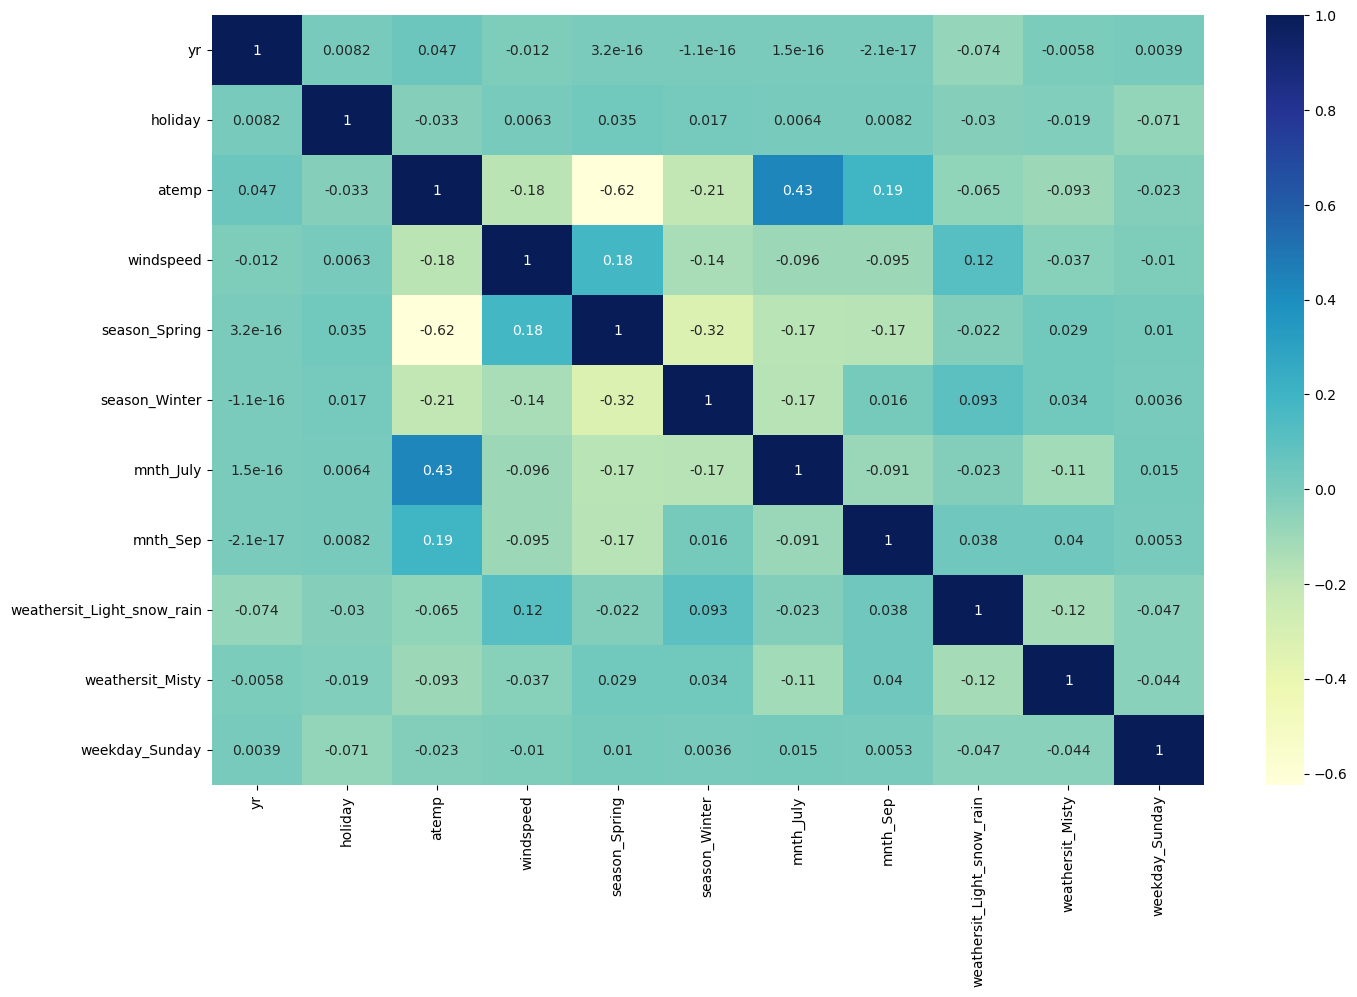

In [95]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_subset[cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

## From HeatMap above, we can confirm that, overall we have a decent model.

## Comparision between Training and Testing dataset:

| **Item**              | **Train Data Set** | **Test Data Set** |
| ----------------- | -------------- | ------------- |
| R^2               |   0.836        | 0.8035        |
| Adjusted R^2      |   0.832        | 0.7845        |


Thus, for the final model with 11 variables, the r-squared on training and test data is about 83.6% and 80.35% respectively. The adjusted r-squared on the train set is about is about 83.2%.

<font color = green> <strong> Please Note : We could have considered Model 5, for simplicity and looks to be a decent model as well.</strong>

## We can see the demand for bikes depends mainly on below variables:

#### year , holiday ,windspeed, temp/atemp, season_Spring, season_Winter, mnth_July, mnth_Sep, Mist_Cloudy, Light rain_Light snow_Thunderstorm, weekday_Sunday
 
##### Demands increases if its season_Winter, with temp, mnth_Sep, with year

##### On the other hand, demand decreases if it is holiday , season_Spring, mnth_July, weathersit_Light rain_Light snow_Thunderstorm, weathersit_Mist_cloudy, weekday_Sunday